## Часть 1. EDA

1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

2. Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

7. Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)

## Часть 2. Моделирование при помощи kNN

1. Разбейте данные на train-test, отложив 30% выборки для тестирования.

2. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

3. Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

4. Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

5. Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:

6. Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

7. Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.
8. Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)
9. Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

## Часть 1. EDA

In [210]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, auc, roc_auc_score

#### Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [211]:
# loading the data from pc
data = pd.read_csv('breast_cancer.csv', index_col=0)
# Убираем лишние столбцы, осталвяем только значащие
subdata = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

#### Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [212]:
subdata.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [213]:
subdata.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

#### Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

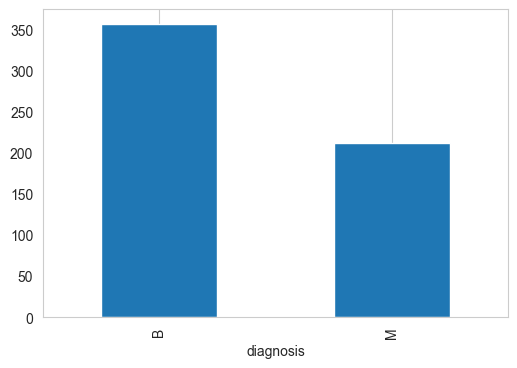

In [214]:
subdata['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [215]:
subdata['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

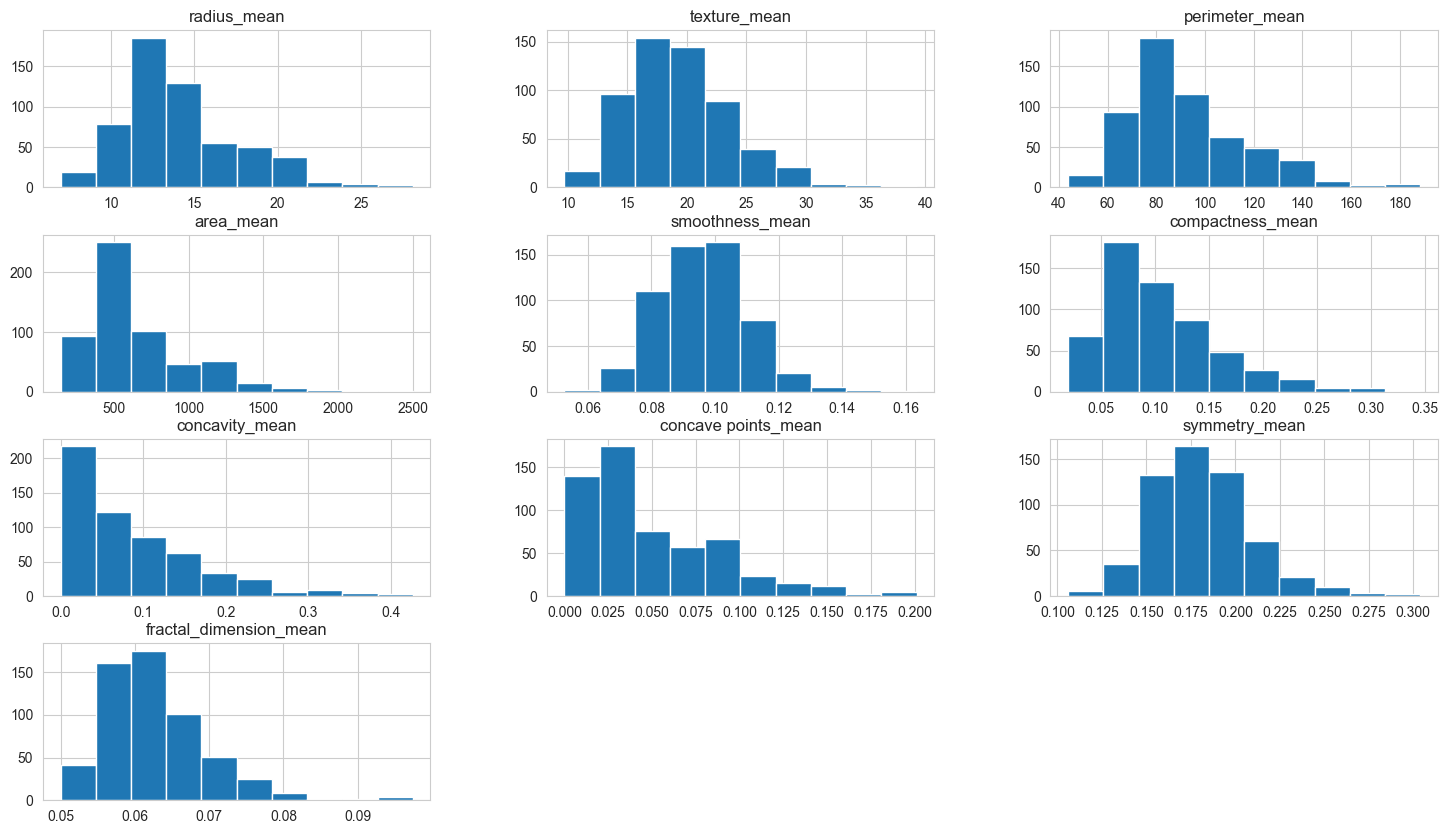

In [216]:
subdata.hist(figsize=(18, 10));

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

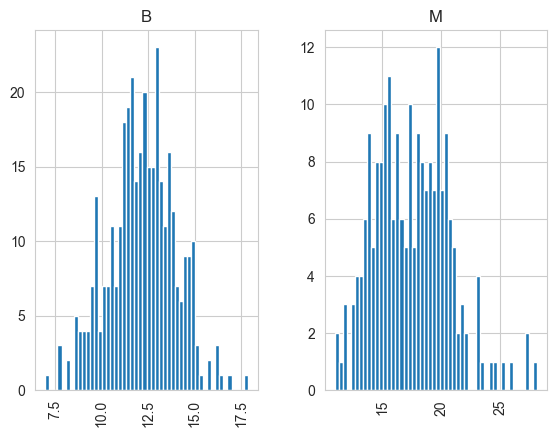

In [217]:
data.hist(['radius_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

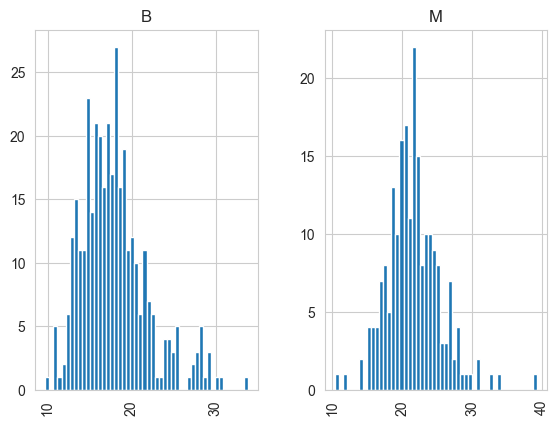

In [218]:
data.hist(['texture_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

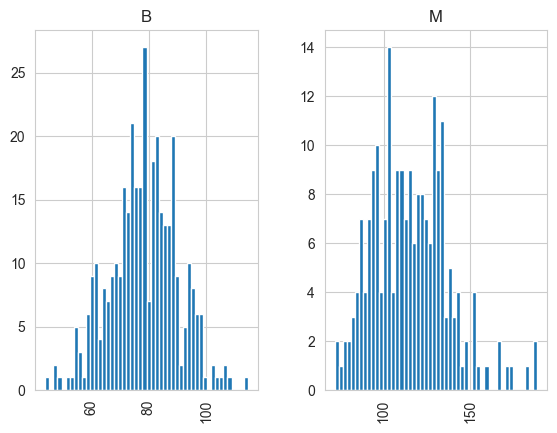

In [219]:
data.hist(['perimeter_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

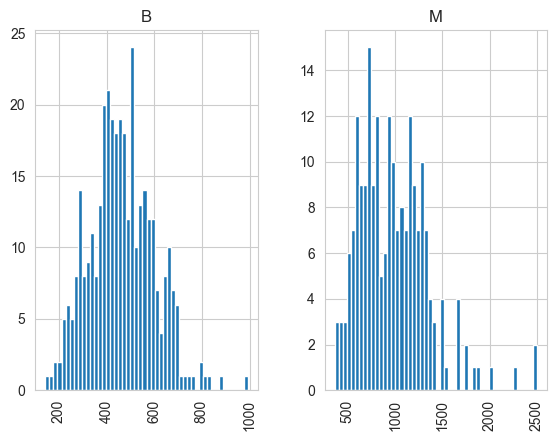

In [220]:
data.hist(['area_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

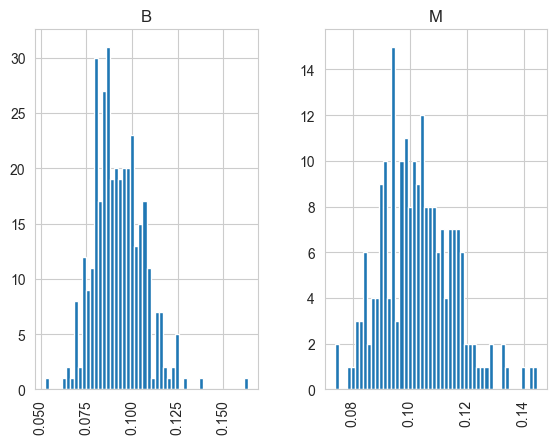

In [221]:
data.hist(['smoothness_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

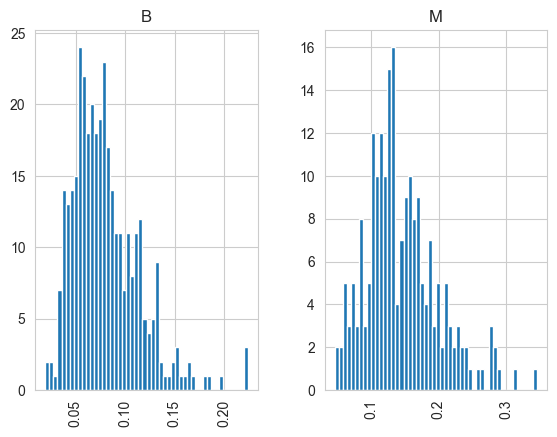

In [222]:
data.hist(['compactness_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

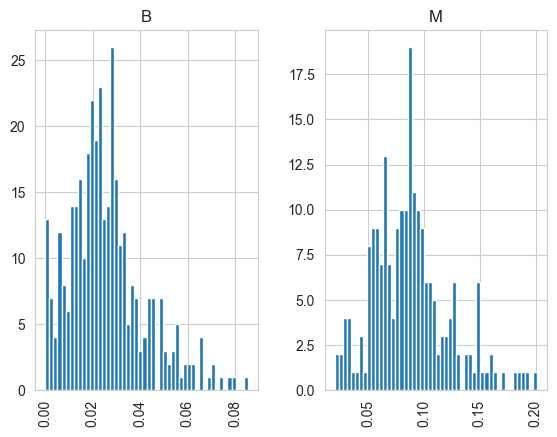

In [223]:
data.hist(['concave points_mean'],bins=50,by='diagnosis')

array([<Axes: title={'center': 'B'}>, <Axes: title={'center': 'M'}>],
      dtype=object)

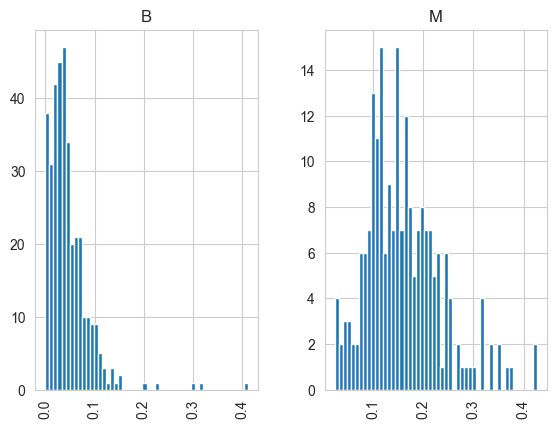

In [224]:
data.hist(['concavity_mean'],bins=50,by='diagnosis')

### Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

In [225]:
subdata.drop('diagnosis', axis=1).corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


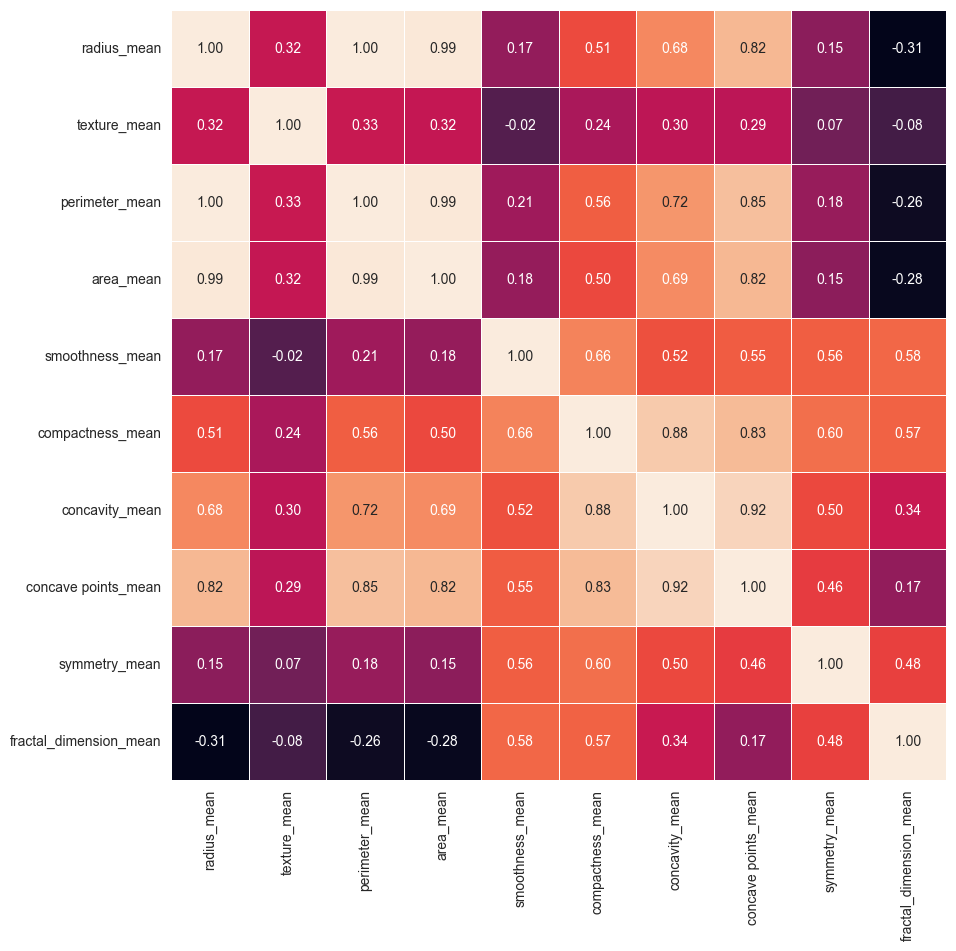

In [226]:
plt.figure(figsize=(10, 10))
sns.heatmap(subdata.drop('diagnosis', axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()


**Выводы**
1. очевидно, что радиус, периметр и площадь (radius, perimetr, area) связаны с друг другом. По сути для дальнейших исследований можно оставить только радиус, как основное значение.
2. также сильно коррелируют между собой два параметра связанных с вогнутостью фигуры
3. радиус связан с вогнутостью фигуры (concavity,concave points). Предполагаю, что при увеличение размера (радиуса) приводит к увеличению вогнутости
3. радиус связан с компактностью фигуры (compactness). Компактность понимаю, как похожесть на круг. 

### Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?


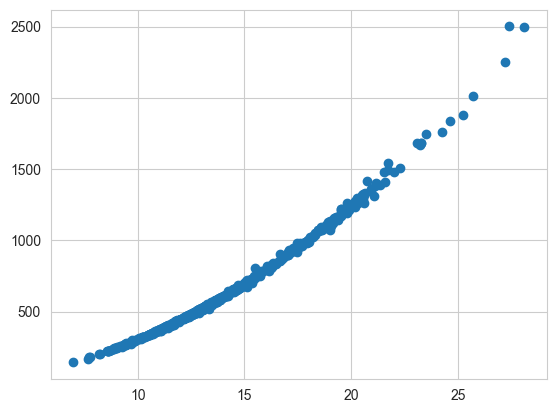

In [227]:
plt.scatter(subdata['radius_mean'],subdata['area_mean'] ) 
# да, зависимость близка к линейной

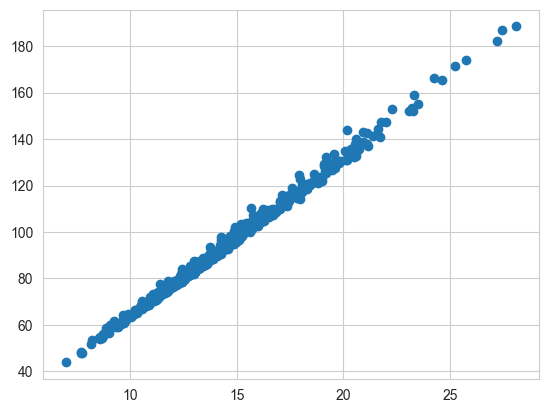

In [228]:
plt.scatter(subdata['radius_mean'],subdata['perimeter_mean'] ) 
# да, зависимость очень близка к линейной

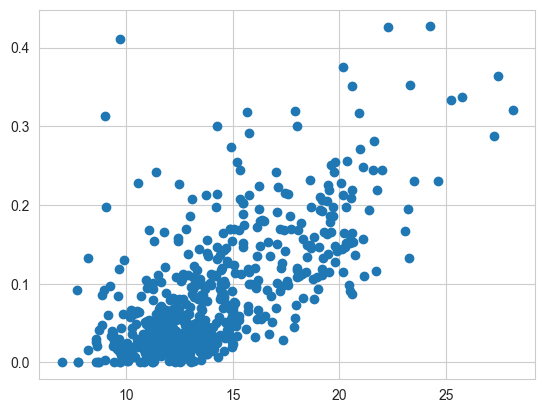

In [229]:
plt.scatter(subdata['radius_mean'],subdata['concavity_mean'] ) 
# можно найти корреляцию

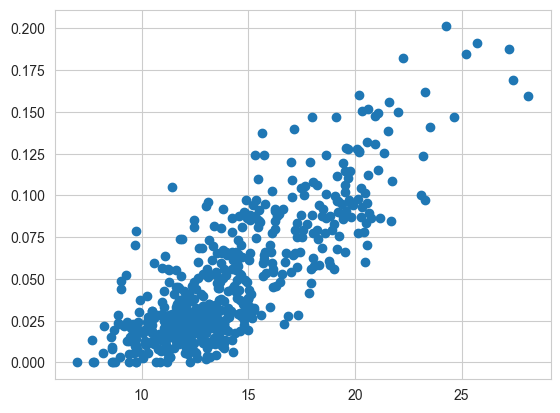

In [230]:
plt.scatter(subdata['radius_mean'],subdata['concave points_mean'] ) 
# да, можно увидеть линейную зависимость

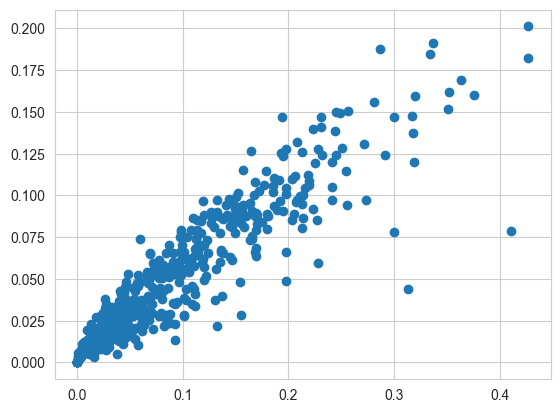

In [231]:
plt.scatter(subdata['concavity_mean'],subdata['concave points_mean'] ) 
# Зависимость очень похожа на линейную

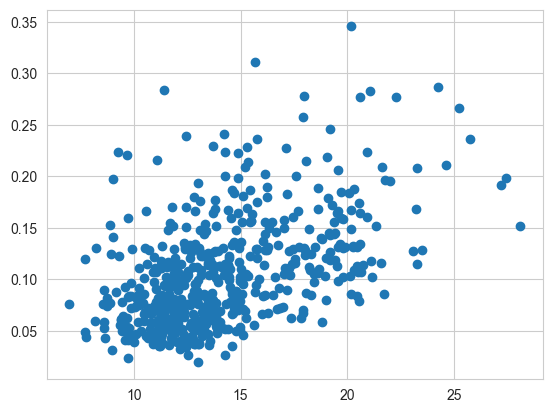

In [232]:
plt.scatter(subdata['radius_mean'],subdata['compactness_mean'] )
# очень сомнительно наличие линейной зависмимости

### Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.


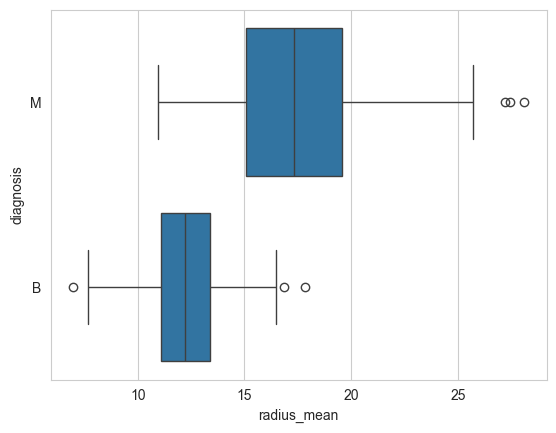

In [233]:
sns.boxplot( x=subdata["radius_mean"], y=subdata["diagnosis"] )
plt.show()
# Признак подходит 

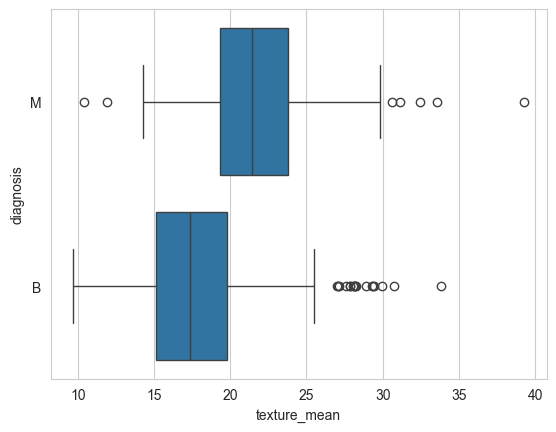

In [234]:
sns.boxplot( x=subdata["texture_mean"], y=subdata["diagnosis"] )
plt.show()
# признак не походит

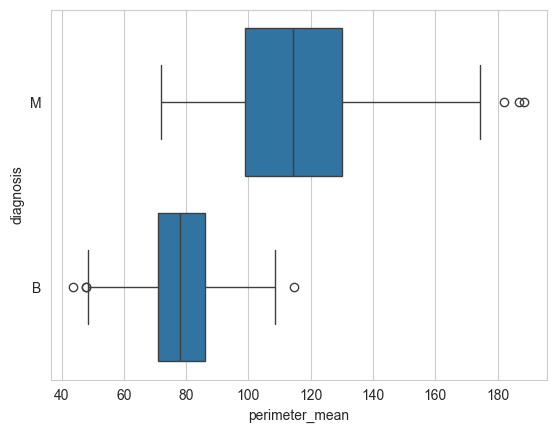

In [235]:
sns.boxplot( x=subdata["perimeter_mean"], y=subdata["diagnosis"] )
plt.show()
# подходит, также как и радиус

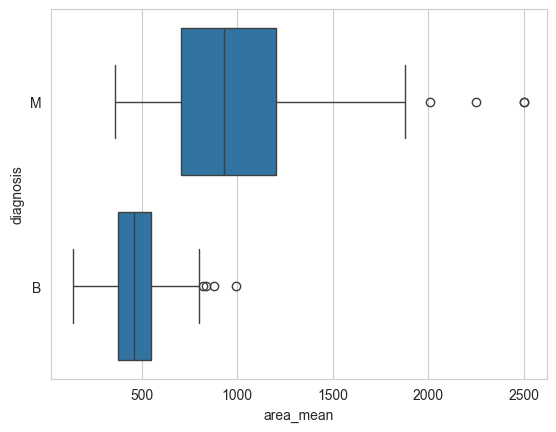

In [236]:
sns.boxplot( x=subdata["area_mean"], y=subdata["diagnosis"] )
plt.show()
# подходит, также как и радиус

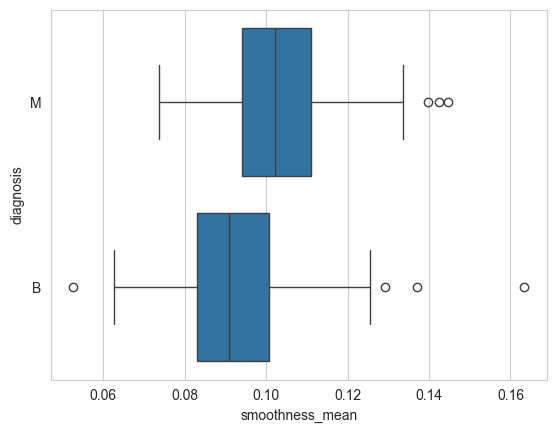

In [237]:
sns.boxplot( x=subdata["smoothness_mean"], y=subdata["diagnosis"] )
plt.show()
# не подходит

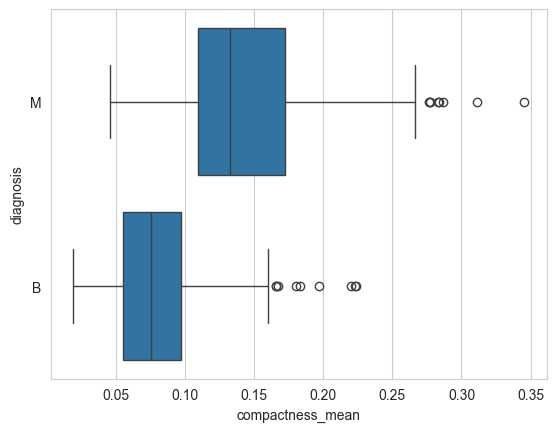

In [238]:
sns.boxplot( x=subdata["compactness_mean"], y=subdata["diagnosis"] )
plt.show()
# Кажется, что может подойти

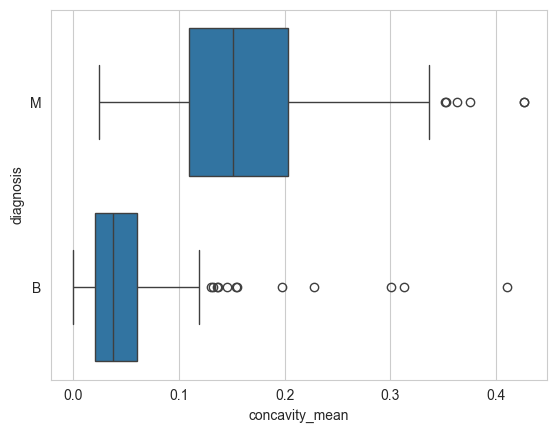

In [239]:
sns.boxplot( x=subdata["concavity_mean"], y=subdata["diagnosis"] )
plt.show()
# подходит

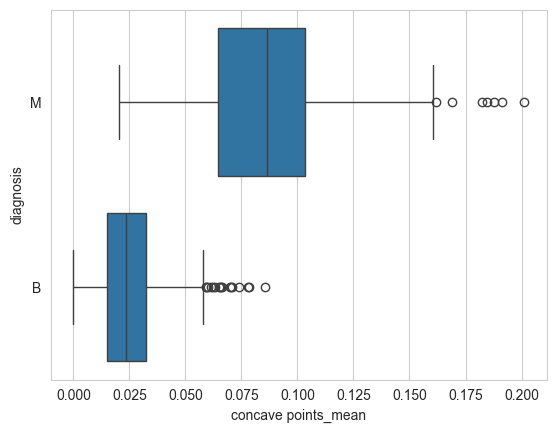

In [240]:
sns.boxplot( x=subdata["concave points_mean"], y=subdata["diagnosis"] )
plt.show()
# подходит

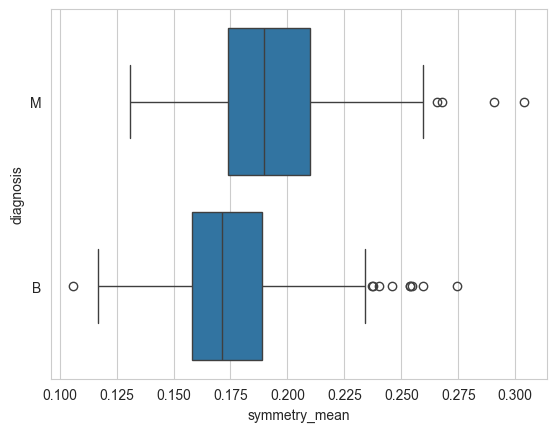

In [241]:
sns.boxplot( x=subdata["symmetry_mean"], y=subdata["diagnosis"] )
plt.show()
# не подходит

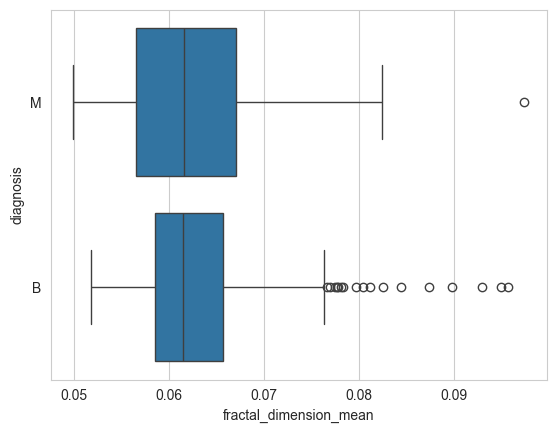

In [242]:
sns.boxplot( x=subdata["fractal_dimension_mean"], y=subdata["diagnosis"] )
plt.show()
# Совсем не подходит

**Признаки для анализа**
- radius
- perimeter
- area
- compactness
- concavity
- concave points 

**После удалению коррелирующих остаётся три**

- radius
- compactness
- concavity


### Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [243]:
X_train, X_test, y_train, y_test = train_test_split(subdata.drop('diagnosis', axis=1), subdata['diagnosis'], test_size=0.3, random_state=84)

### Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [244]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# переменные имеют значительный разброс например area имеет диапозон от 143 до 2500 , а smoothness от 0,05 до 0,16


### Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [245]:
# так как мы выявляем злокачественные опухоли, то кажется что выявление именно злокачественной опухоли это для нас позитивный результат. Поэтому в качестве pos_label установил Malignant 
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y,pos_label='M')
    recall = recall_score(prediction_y, true_y,pos_label='M')
    f1 = f1_score(prediction_y, true_y,pos_label='M')
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [246]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)

Accuracy:  0.953
Precision: 0.962
Recall:    0.893
F1-score:  0.926


In [247]:
y_pred_full = knn.predict_proba(X_test_scaled)
y_pred_prob=y_pred_full[:,1]
roc_auc_score(y_test, y_pred_prob)


np.float64(0.9880413703943115)

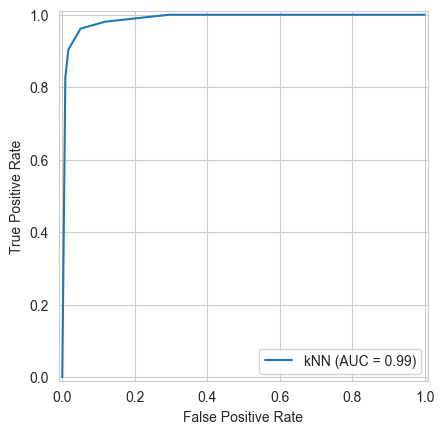

In [248]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label='M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='kNN')
display.plot()


### Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)knn = KNeighborsClassifier(n_neighbors=5)

In [249]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)
#при 7 также

Accuracy:  0.953
Precision: 0.962
Recall:    0.893
F1-score:  0.926


In [250]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
quality(y_pred, y_test)
# при 3-х хуже

Accuracy:  0.942
Precision: 0.962
Recall:    0.862
F1-score:  0.909



### Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.


In [251]:
# А вот логистическая регрессия показала, очень хороший результат, поэтому кажется  что можно не удалять переменные.
# но возможно неправильно посчитал, поэтому 



### Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

In [252]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
log_reg = LogisticRegression(C=0.001)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
quality(y_pred, y_test)

Accuracy:  0.901
Precision: 0.673
Recall:    1.000
F1-score:  0.805


In [253]:
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:,1]
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)
logit_roc_auc

np.float64(0.9877181641887525)

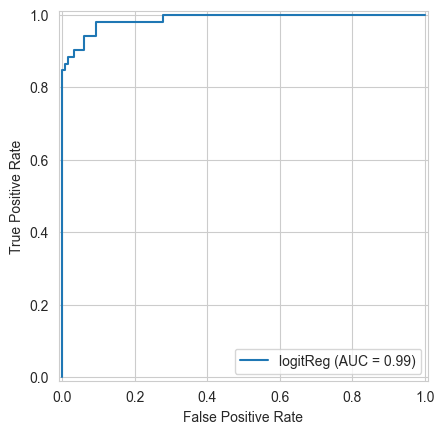

In [254]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob,pos_label='M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='logitReg')
display.plot()

### Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)

In [255]:
Cs = np.logspace(-5, 20, 100) # Задаем массив возможных значений гиперпараметров
model = LogisticRegressionCV(Cs=Cs, random_state=84, refit=True, scoring='roc_auc')
model.fit(X_train_scaled, y_train)
best_C = model.C_[0] 
best_C

np.float64(0.10974987654930568)

In [256]:
y_pred = model.predict(X_test_scaled)
quality(y_pred, y_test)

Accuracy:  0.942
Precision: 0.846
Recall:    0.957
F1-score:  0.898


In [257]:
roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

np.float64(0.9922430510665805)

### Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

#### Логистическая регрессия оказалась, в итоге лучше, при использовании автоматически настроенных параметров